In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a COCO-pretrained YOLO12n model
model = YOLO("yolo12m.pt")

In [45]:
results = model("/home/alan_khang/Downloads/captured_images/captured_image_202.jpg")


image 1/1 /home/alan_khang/Downloads/captured_images/captured_image_202.jpg: 384x640 1 person, 40.7ms
Speed: 1.9ms preprocess, 40.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


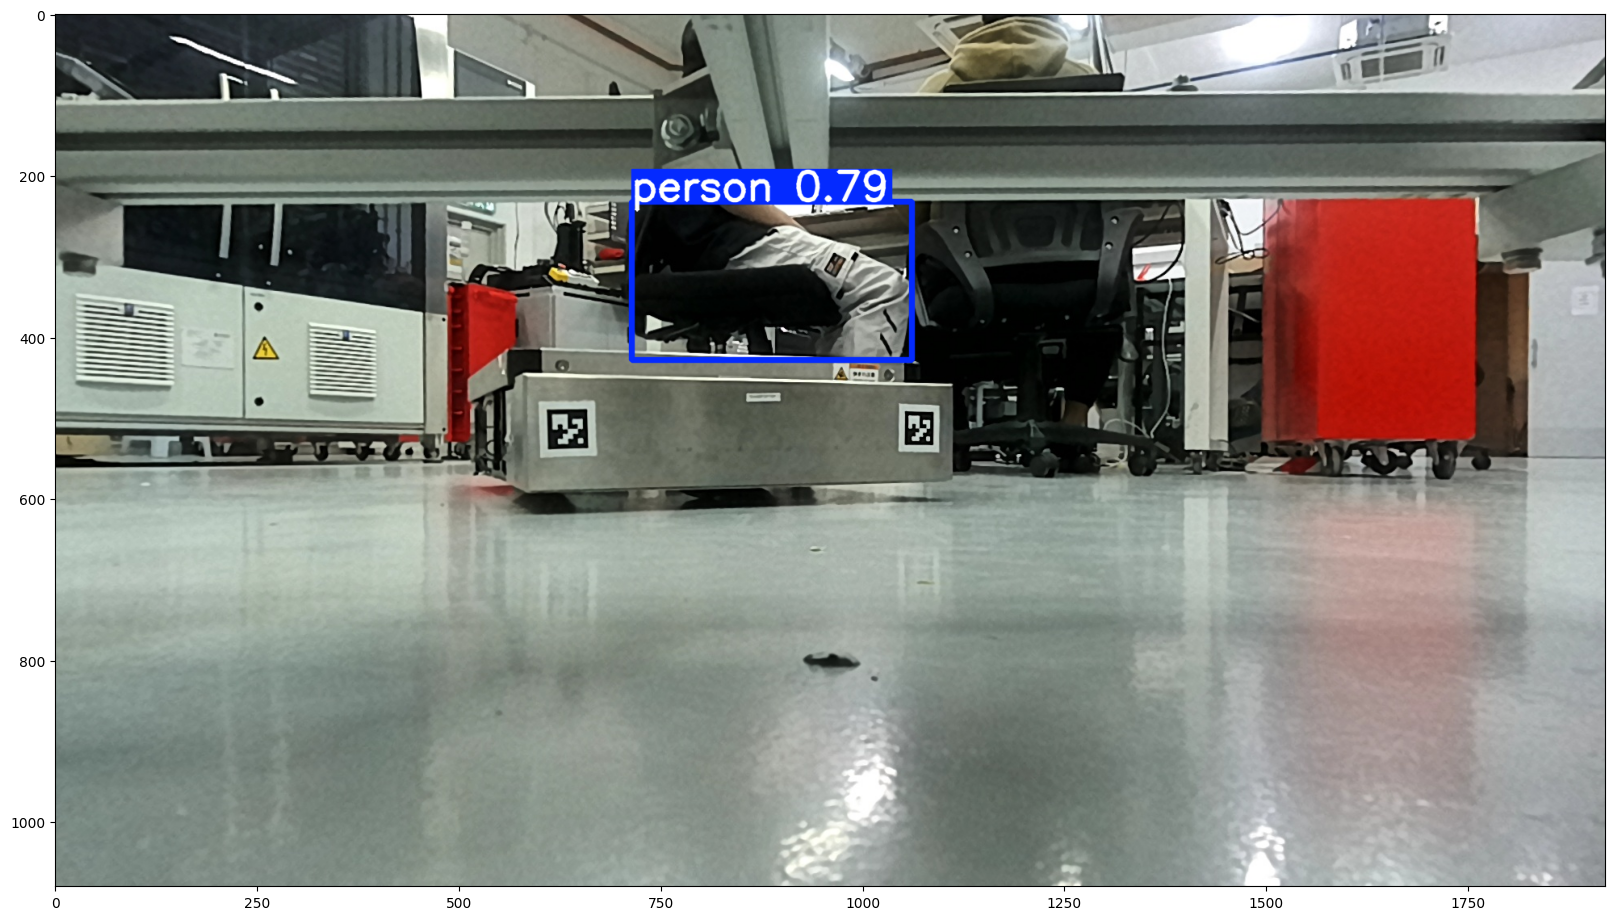

In [46]:
_ = plt.figure(figsize=(20, 20))
plt.imshow(results[0].plot()[..., ::-1])

In [47]:
from scipy.ndimage import label, generate_binary_structure
import numpy as np
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]])
labeled_array, num_features = label(a)

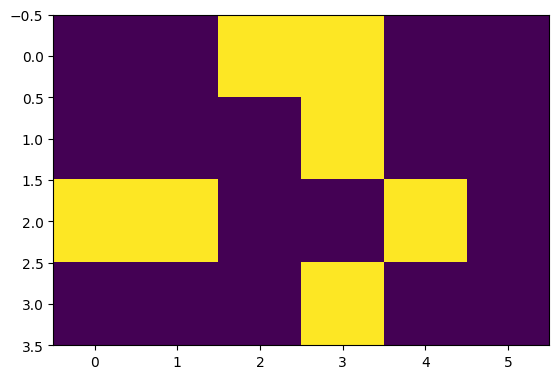

In [48]:
plt.imshow(a)

In [49]:
labeled_array

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [2, 2, 0, 0, 3, 0],
       [0, 0, 0, 4, 0, 0]], dtype=int32)

In [51]:
help(label)

Help on function label in module scipy.ndimage._measurements:

label(input, structure=None, output=None)
    Label features in an array.
    
    Parameters
    ----------
    input : array_like
        An array-like object to be labeled. Any non-zero values in `input` are
        counted as features and zero values are considered the background.
    structure : array_like, optional
        A structuring element that defines feature connections.
        `structure` must be centrosymmetric
        (see Notes).
        If no structuring element is provided,
        one is automatically generated with a squared connectivity equal to
        one.  That is, for a 2-D `input` array, the default structuring element
        is::
    
            [[0,1,0],
             [1,1,1],
             [0,1,0]]
    
    output : (None, data-type, array_like), optional
        If `output` is a data type, it specifies the type of the resulting
        labeled feature array.
        If `output` is an array-li

In [2]:
depth_map = cv2.imread('/home/alan_khang/Downloads/depth_000085.png', cv2.IMREAD_UNCHANGED)
depth_map = depth_map[:depth_map.shape[0] // 2, :]  # Crop the depth map to the lower half

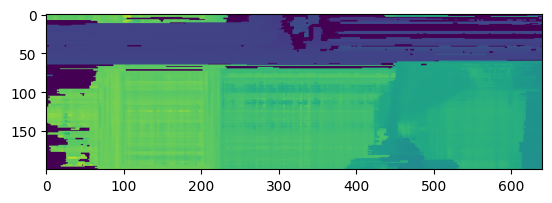

In [3]:
plt.imshow(depth_map)

In [4]:
depth_display_visual = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
depth_display_visual = cv2.applyColorMap(depth_display_visual, cv2.COLORMAP_JET)

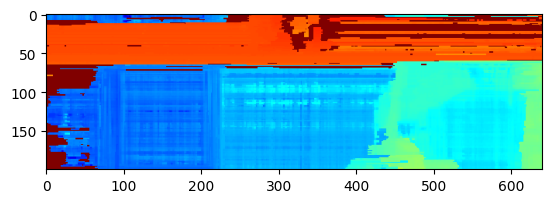

In [5]:
plt.imshow(depth_display_visual)

In [6]:
depth_map

array([[1407, 1393, 1393, ...,  364,  364,  364],
       [1407, 1393, 1393, ...,  357,  357,  357],
       [1401, 1379, 1379, ...,  360,  360,  359],
       ...,
       [   0,    0,    0, ...,  904,  904,  902],
       [   0,    0,    0, ...,  904,  904,  902],
       [   0,    0,    0, ...,  904,  904,  908]], dtype=uint16)

In [10]:
warning_thresh = 750
critical_thresh = 500

In [11]:
depth_binary = np.zeros_like(depth_map, dtype=np.uint8)

selected_thresh = warning_thresh

depth_map[depth_map == 0] = selected_thresh 
depth_binary[depth_map < selected_thresh] = 1
depth_binary[depth_map >= selected_thresh] = 0

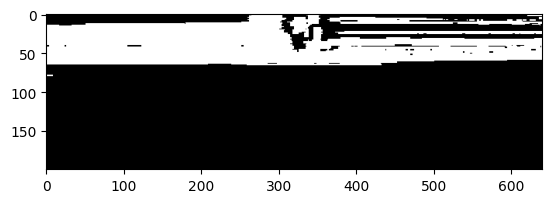

In [12]:
plt.imshow(depth_binary, cmap='gray')

In [13]:
len(depth_binary[depth_binary == 1]) / len(depth_binary[depth_binary == 0])

0.3058959160145689

In [ ]:
len(depth_binary[depth_binary == 1]) 

29983

In [22]:
len(depth_binary[depth_binary == 1]) / depth_binary.size

0.2342421875